In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import brenth

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
pi=4*np.arctan(1.)

In [2]:
def U(x):
    return x**2+0.02*(np.cos(167*x)+np.sin(73*x))

def dU(x):
    return 2*x+0.02*(-167*np.sin(167*x)+73*np.cos(73*x))

def T(x):
    return 1.-(dU(x)/g1)**2

def dT(x):
    return -2*dU(x)*ddU(x)/g1**2

def ddU(x):
    return 2.+0.02*(-167**2*np.cos(167*x)-73**2*np.sin(73*x))

def Ueff(x):
    return U(x)+T(x)/g2

def dUeff(x):
    return dU(x)*(1.-2*ddU(x)/(g2*g1**2))

def ddUeff(x):
    return ddU(x)*(1.-2*ddU(x)/(g2*g1**2))

In [3]:
def LL(x):
    return dU(x)+g1

def UL(x):
    return dU(x)-g1

def integrand(x):
    return dUeff(x)/T(x)

In [4]:
def root(F, x1, x2, div, it):
    X=np.linspace(x1,x2, div)
    roots=np.array([])
    for i in range(div-1):
        if F(X[i])*F(X[i+1])<=0:
            p1=X[i]
            p2=X[i+1]
            r=brenth(F, p1, p2, maxiter=it)
            roots=np.append(roots, r)
    return roots

In [5]:
def integral2(F, X):
    l=len(X)
    Func=np.zeros(l)
    id0=int(0.5*l)
    xmin=X[id0]
    Func[id0]=0
    for i in range(1,l):
        if i<=id0:
            x0 = X[id0-i+1]
            x1 = X[id0-i]
            Func[id0-i]=integrate.quad(F, x0, x1)[0]
            Func[id0-i]=Func[id0-i]+Func[id0-i+1]
        else:
            x0 = X[i-1]
            x1 = X[i]
            Func[i]=integrate.quad(F, x0, x1)[0]
            Func[i]=Func[i]+Func[i-1]
    return Func

## G1 mininum

In [6]:
g1=7
dg1=1e-2
value=1
while value>0:
    L1=-0.5*g1-0.02*167
    L2=-0.5*g1+0.02*167
    U1=0.5*g1-0.02*167
    U2=0.5*g1+0.02*167

    rmax=root(UL, U1,U2, 10000, 300)
    rmin=root(LL, L1,L2, 10000, 300)

    if min(rmax)>max(rmin):
        xmax=min(rmax)
        xmin=max(rmin)
    else: 
        imax=np.argmin(np.absolute(rmax))
        imin=np.argmin(np.absolute(rmin))
        xmin=np.minimum(rmax[imax], rmin[imin])
        xmax=np.maximum(rmax[imax], rmin[imin])

    rT = root(dT, xmin, xmax, 30000, 300)
    value = min(T(rT))
    g1=g1-dg1
g1min=g1
print (g1min)

6.220000000000017


## Plot some functions

In [7]:
g1=1.01*g1min
g2=1

L1=-0.5*g1-0.02*167
L2=-0.5*g1+0.02*167

U1=0.5*g1-0.02*167
U2=0.5*g1+0.02*167

rmax=root(UL, U1,U2, 10000, 300)
rmin=root(LL, L1,L2, 10000, 300)

if min(rmax)>max(rmin):
    xmax=min(rmax)
    xmin=max(rmin)
else: 
    imax=np.argmin(np.absolute(rmax))
    imin=np.argmin(np.absolute(rmin))
    xmin=np.minimum(rmax[imax], rmin[imin])
    xmax=np.maximum(rmax[imax], rmin[imin])
    
r = root(dU, xmin, xmax, 30000, 300)
x=np.linspace(xmin,xmax, 2000)
x=np.concatenate([x,r])
x=np.sort(x)

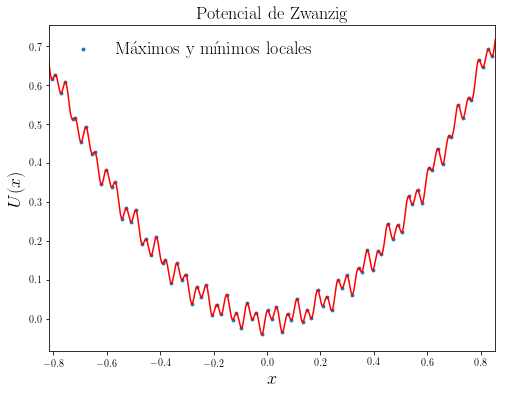

In [8]:
plt.figure(figsize=(8, 6))

plt.plot(x, U(x), color='red')
plt.scatter(r, U(r), lw= 0, s= 15, label=r'M\'aximos y m\'inimos locales')
plt.xlim([xmin,xmax])
plt.title(r'Potencial de Zwanzig', fontsize=18)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$U(x)$', fontsize=18)
plt.legend(loc='best', frameon=0, fontsize=18)

plt.savefig('Uzwanzig.png', bbox_inches='tight')
plt.show()
plt.close()

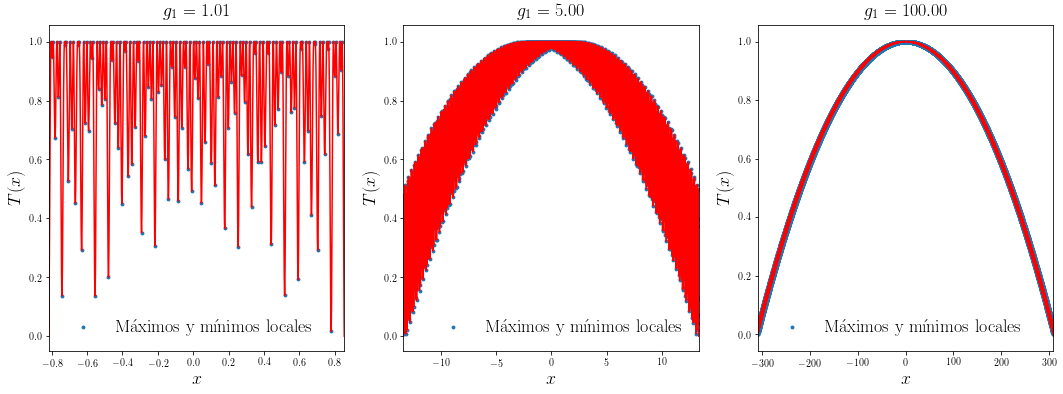

In [9]:
G1=np.array([1.01, 5, 100])
plt.figure(figsize=(18, 6))
for i in range(3):
    g1=G1[i]*g1min

    L1=-0.5*g1-0.02*167
    L2=-0.5*g1+0.02*167
    U1=0.5*g1-0.02*167
    U2=0.5*g1+0.02*167

    rmax=root(UL, U1,U2, 10000, 300)
    rmin=root(LL, L1,L2, 10000, 300)

    if min(rmax)>max(rmin):
        xmax=min(rmax)
        xmin=max(rmin)
    else: 
        imax=np.argmin(np.absolute(rmax))
        imin=np.argmin(np.absolute(rmin))
        xmin=np.minimum(rmax[imax], rmin[imin])
        xmax=np.maximum(rmax[imax], rmin[imin])

    #reff=root(dUeff, xmin, xmax, 30000, 300)
    rT = root(dT, xmin, xmax, 30000, 300)
    x=np.linspace(xmin,xmax, 2000)
    x=np.append(x,rT)
    x=np.sort(x)

    plt.subplot(1,3,i+1)
    plt.plot(x, T(x), color='red')
    plt.scatter(rT, T(rT), lw= 0, s= 15, label=r'M\'aximos y m\'inimos locales')
    plt.xlim([xmin,xmax])
    plt.title(r'$g_1 = %.2f$'%G1[i], fontsize=18)
    plt.xlabel('$x$', fontsize=18)
    plt.ylabel('$T(x)$', fontsize=18)
    plt.legend(loc='best', frameon=0, fontsize=18)

plt.show()
plt.close()

## Effective potential

In [77]:
times=2.00
g1=times*g1min

L1=-0.5*g1-0.02*167
L2=-0.5*g1+0.02*167
U1=0.5*g1-0.02*167
U2=0.5*g1+0.02*167

rmax=root(UL, U1,U2, 10000, 300)
rmin=root(LL, L1,L2, 10000, 300)

if min(rmax)>max(rmin):
    xmax=min(rmax)
    xmin=max(rmin)
else: 
    imax=np.argmin(np.absolute(rmax))
    imin=np.argmin(np.absolute(rmin))
    xmin=np.minimum(rmax[imax], rmin[imin])
    xmax=np.maximum(rmax[imax], rmin[imin])

In [78]:
r = root(dU, xmin, xmax, 50000, 300)
g2= 1e-7
D = ddU(r)
r = r[ D > 0] 
D = D[ D > 0]
sort = np.argsort(D)
r = r[sort]

g2c = np.array([])
for idx in range(len(r)):
    value = -1
    counter = 0
    dg2 = 1e-3
    while value < 0 :
        g2 = g2 + dg2
        value = ddUeff(r[idx])
        counter = counter + 1
        #if np.mod(counter, 20)== 0:
        #    dg2 = 2*dg2
    g2c = np.append(g2c, g2)

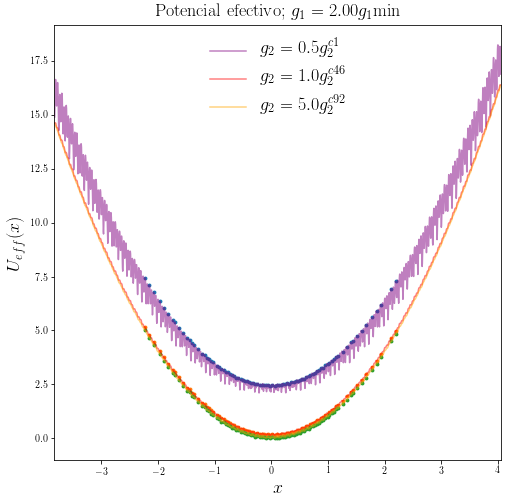

In [79]:
G2 = np.array([0.5*g2c[0], g2c[int(0.5*len(g2c))], 5*g2c[-1]])
idx = np.array([1, int(0.5*len(g2c))+1, len(g2c)+1 ], dtype=int)
legend = np.array([0.5, 1, 5])
color=['purple', 'red', 'orange']

x=np.linspace(0.999*xmin,0.999*xmax, 2000)

plt.figure(figsize=(8, 8))
for i in range(3):
    #plt.subplot(1,3,i+1)
    g2 = G2[i]
    plt.plot(x, Ueff(x), color=color[i], alpha= 0.5, label=r'$g_2 = %.1f g_2^{c%d}$'%(legend[i],idx[i]))
    plt.scatter(r, Ueff(r), lw=0, s=15)
    plt.xlim([xmin,xmax])
    
    plt.xlabel('$x$', fontsize=18)
    plt.ylabel(r'$U_{eff}(x)$', fontsize=18)
    plt.legend(frameon=0, loc='best', fontsize=18)
    plt.title('Potencial efectivo; $g_1 = %.2f g_1$min'%times, fontsize=18)
plt.show()

## Probability distributions

In [80]:
G2 = np.array([0.5*g2c[0], g2c[int(0.5*len(g2c))], 5*g2c[-1]])
idx = np.array([1, int(0.5*len(g2c))+1, len(g2c)+1 ], dtype=int)
legend = np.array([0.5, 1, 5])
color=['purple', 'red', 'orange']

r = root(dU, xmin, xmax, 50000, 300)
x = np.concatenate([x, r])
x = np.sort(x)

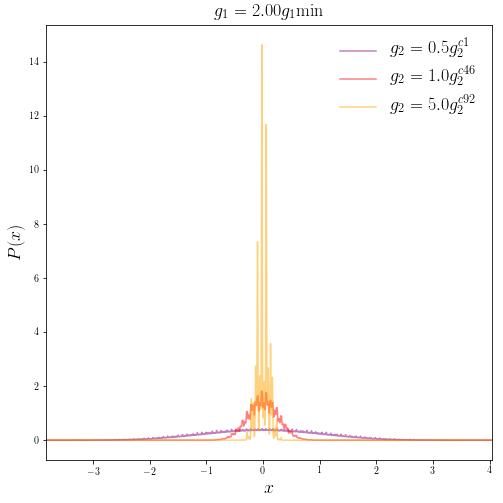

In [81]:
plt.figure(figsize=(8, 8))
for j in range(len(G2)):
    g2=G2[j]    
    inte=integral2(integrand, x)
    inte=-g2*inte
    prob=np.exp(inte)
    prob[prob==np.nan]=0
    Z=np.trapz(prob, x)
    plt.plot(x, prob/Z, color=color[j], alpha = 0.5, label = r'$g_2 = %.1f g_2^{c%d}$'%(legend[j],idx[j]))    
    
plt.xlim([xmin,xmax])
plt.xlabel(r'$x$', fontsize=18)
plt.ylabel('$P(x)$', fontsize=18)
plt.title(r'$g_1=%.2f g_1$min'%times, fontsize=18)
plt.legend(loc='best', frameon=0, fontsize=18)
plt.show()

## Muchas distribuciones (falta calcular g2c)

In [44]:
G2 = np.array([0.5*g2c[0], g2c[int(0.5*len(g2c))], 5*g2c[-1]])
idx = np.array([1, int(0.5*len(g2c))+1, len(g2c)+1 ], dtype=int)
legend = np.array([0.5, 1, 5])
G1=np.array([1.01, 2.5, 5])
color=['purple', 'red', 'orange']

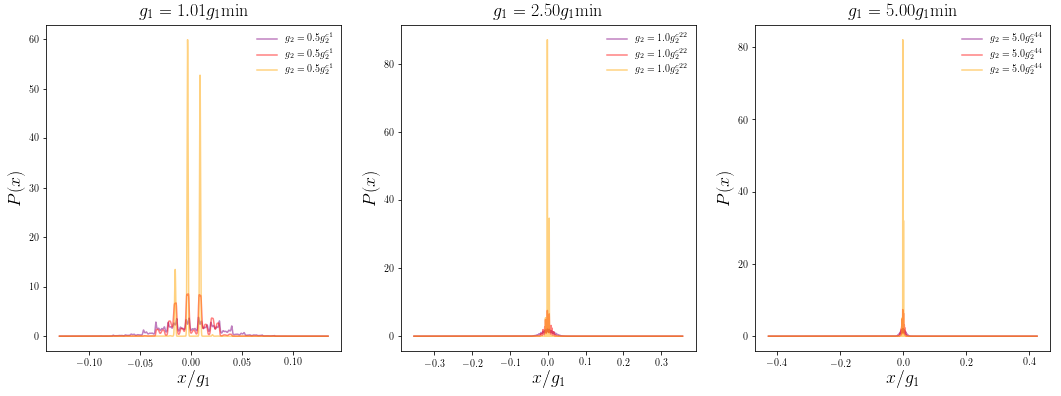

In [45]:
plt.figure(figsize=(18, 6))
for i in range(len(G1)):
    g1=G1[i]*g1min

    L1=-0.5*g1-0.02*167
    L2=-0.5*g1+0.02*167
    U1=0.5*g1-0.02*167
    U2=0.5*g1+0.02*167

    rmax=root(UL, U1,U2, 10000, 300)
    rmin=root(LL, L1,L2, 10000, 300)
    if min(rmax)>max(rmin):
        xmax=min(rmax)
        xmin=max(rmin)
    else: 
        imax=np.argmin(np.absolute(rmax))
        imin=np.argmin(np.absolute(rmin))
        xmin=np.minimum(rmax[imax], rmin[imin])
        xmax=np.maximum(rmax[imax], rmin[imin])
        
    r=root(dUeff, xmin, xmax, 30000, 300)
    x=np.linspace(0.99*xmin, 0.99*xmax, 5000)
    x=np.append(x, r)
    x=np.sort(x)
    plt.subplot(1, 3, i+1)
    for j in range(len(G2)):
        g2=G2[j]    
        inte=integral2(integrand, x)
        inte=-g2*inte
        prob=np.exp(inte)
        prob[prob==np.nan]=0
        Z=np.trapz(prob, x)
        plt.plot(x/g1, prob/Z, color=color[j], alpha = 0.5, label = r'$g_2 = %.1f g_2^{c%d}$'%(legend[i],idx[i]))    

    plt.xlabel(r'$x/g_1$', fontsize=18)
    plt.ylabel('$P(x)$', fontsize=18)
    plt.title(r'$g_1=%.2f g_1$min'%G1[i], fontsize=18)
    plt.legend(loc='best', frameon=0)
plt.show()

In [47]:
G1=np.array([1.01, 2.5, 5])
g2=g2c[10]
v1=np.zeros(len(G1))
v2=np.zeros(len(G1))
nroot=np.zeros(len(G1))

In [48]:
for i in range(len(G1)):
    g1=G1[i]*g1min

    L1=-0.5*g1-0.02*167
    L2=-0.5*g1+0.02*167
    U1=0.5*g1-0.02*167
    U2=0.5*g1+0.02*167
    rmax=root(UL, U1,U2, 10000, 300)
    rmin=root(LL, L1,L2, 10000, 300)

    if min(rmax)>max(rmin):
        xmax=min(rmax)
        xmin=max(rmin)
    else: 
        imax=np.argmin(np.absolute(rmax))
        imin=np.argmin(np.absolute(rmin))
        xmin=np.minimum(rmax[imax], rmin[imin])
        xmax=np.maximum(rmax[imax], rmin[imin])
        
    r=root(dUeff, xmin, xmax, 30000, 300)
    v1[i]=xmin
    v2[i]=xmax
    nroot[i]=len(r)

In [49]:
Interval=np.absolute(v2-v1)
P1=2*pi/167.
P2=2*pi/73.
Nroot=Interval*(1./P1+1./P2)

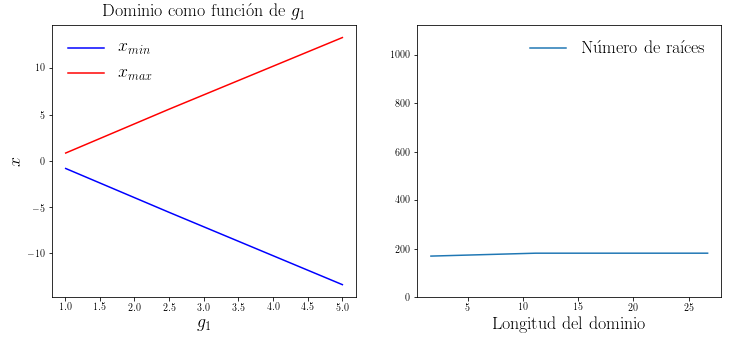

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(Interval, nroot, label=r'N\'umero de ra\'ices')
#plt.plot(Interval, Nroot, label=r'$I(1/P_1+1/P_2)$')
plt.ylim([0, 1.1*np.maximum(max(nroot), max(Nroot))])
plt.xlabel('Longitud del dominio', fontsize=18)
plt.legend(loc='best', frameon=0, fontsize=18)

plt.subplot(1,2, 1)
plt.plot(G1, v1, color='blue', label=r'$x_{min}$')
plt.plot(G1, v2, color='red', label=r'$x_{max}$')
plt.xlabel('$g_1$', fontsize=18)
plt.ylabel('$x$', fontsize=18)
plt.legend(loc='best', frameon=0, fontsize=18)
plt.title(r'Dominio como funci\'on de $g_1$', fontsize=18)

plt.show()